# Clustering

Clustering of data using different clustering techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.optimize import linear_sum_assignment

Using Iris flower dataset file

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data = df.drop(['Species'], axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Scaling the data before applying PCA

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(data)
print(X_scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

Applying PCA

In [30]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
prComp = pca.fit_transform(X_scaled)
prDF = pd.DataFrame(data=prComp, columns=['X1', 'X2'])
#Making a copy of dataframe
reduced_data = prDF.copy()
red_df = prDF.copy()
print(prDF)

           X1        X2
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


Plotting the dataframe

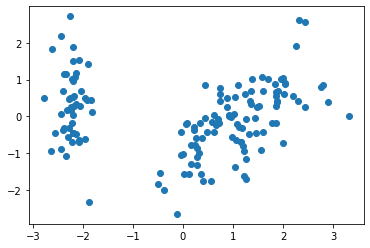

In [10]:
plt.scatter(prDF['X1'],prDF['X2'])
plt.show()

# K-means Clustering 

In [12]:
km = KMeans(n_clusters = 3)
km.fit(prDF)
y_predict = km.predict(prDF)
cluster_center = km.cluster_centers_
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


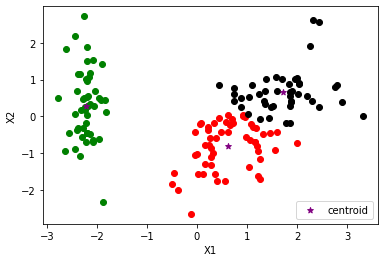

In [13]:
prDF['cluster'] = y_predict

df1 = prDF[prDF['cluster']==0]
df2 = prDF[prDF['cluster']==1]
df3 = prDF[prDF['cluster']==2]

#Plotting the clusters
plt.scatter(df1.X1,df1['X2'],color='green')
plt.scatter(df2.X1,df2['X2'],color='red')
plt.scatter(df3.X1,df3['X2'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [14]:
print("\nSum of squared distances of samples to their closest cluster centre :%.2f"%km.inertia_)


Sum of squared distances of samples to their closest cluster centre :116.24


Purity Score

In [15]:
def purity_score(y_true, y_pred):
    # computing contingency matrix (also called confusion matrix)
    contingency_matrix=metrics.cluster.contingency_matrix(y_true, y_pred)
    #print the contingency_matrix
    # calculating optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    #Return cluster accuracy

    return contingency_matrix[row_ind,col_ind].sum()/np.sum(contingency_matrix)

In [16]:
df['cluster']= y_predict

df["Species"].replace({"Iris-setosa": 0,"Iris-versicolor" : 1,"Iris-virginica":2}, inplace=True)
species = list(df["Species"])
purity = purity_score(species, y_predict)
print("\nThe purity score after examples are assigned to clusters : %.2f"%purity)


The purity score after examples are assigned to clusters : 0.82


Implementing K-means clustering for number of clusters (K) as 2, 3, 4, 5, 6 and 7 :-

In [18]:
sse = []
score = [] #Purity Score
k_rng = [2,3,4,5,6,7]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(prDF[['X1','X2']])
    sse.append(km.inertia_)
    y_pred = km.predict(prDF[['X1','X2']])
    score.append(purity_score(species,y_pred))

Plotting of K vs distortion measure :-

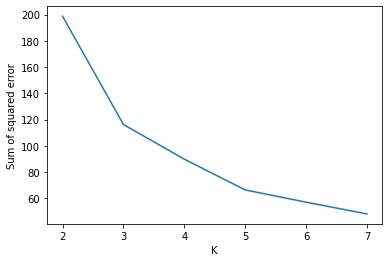

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

Purity score for different clusters :-

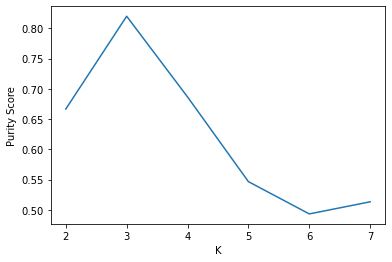

In [20]:
plt.xlabel('K')
plt.ylabel('Purity Score')
plt.plot(k_rng,score)
plt.show()

#  GMM : Gaussian Mixture Model

In [23]:
from sklearn.mixture import GaussianMixture
K = 3
gmm = GaussianMixture(n_components = K)
gmm.fit(reduced_data)
GMM_prediction = gmm.predict(reduced_data)

print("Total data log likelihood at the last iteration of the GMM : %.2F"%gmm.score(reduced_data[['X1','X2']]))

Total data log likelihood at the last iteration of the GMM : -2.53


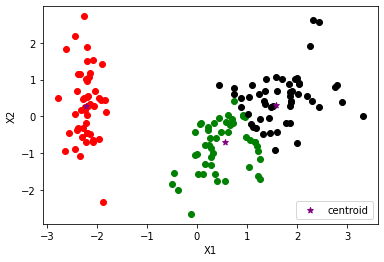

The purity score after examples are assigned to clusters : 86.67


In [24]:
reduced_data['cluster'] = GMM_prediction


df_1 = reduced_data[reduced_data['cluster']==0]
df_2 = reduced_data[reduced_data['cluster']==1]
df_3 = reduced_data[reduced_data['cluster']==2]

#Plotting the clusters
plt.scatter(df_1.X1,df_1['X2'],color='green')
plt.scatter(df_2.X1,df_2['X2'],color='red')
plt.scatter(df_3.X1,df_3['X2'],color='black')
plt.scatter(gmm.means_[:,0],gmm.means_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

purity_gmm = purity_score(species, GMM_prediction)
print("The purity score after examples are assigned to clusters : %.2f"%(100*purity_gmm))

In [27]:
log_liklihood = []
score_gmm = [] #Purity Score
g_rng = [2,3,4,5,6,7]
for g in g_rng:
    gmm = GaussianMixture(n_components = g)
    gmm.fit(reduced_data[['X1','X2']])
    log_liklihood.append(gmm.score(reduced_data[['X1','X2']]))
    GMM_prediction_ = gmm.predict(reduced_data[['X1','X2']])
    score_gmm.append(purity_score(species,GMM_prediction_))

Plotting K vs total data log likelihood :-

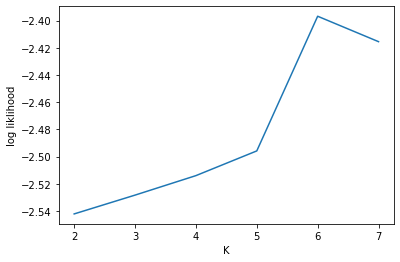

In [28]:
plt.xlabel('K')
plt.ylabel('log liklihood')
plt.plot(g_rng,log_liklihood)
plt.show()

Purity score for the different number of clusters :-

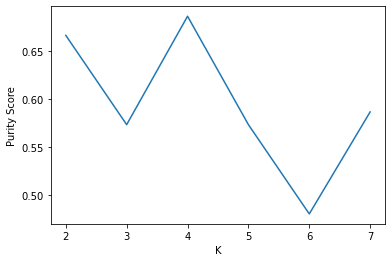

In [29]:
plt.xlabel('K')
plt.ylabel('Purity Score')
plt.plot(g_rng,score_gmm)
plt.show()

# K-Means VS GMM

In case of K-means, purity score is highest for number of cluster 3 but in GMM , It is highest for number of cluster 4

# DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
dbscan_model=DBSCAN(eps=1, min_samples=5).fit(red_df)
DBSCAN_predictions = dbscan_model.labels_
print(np.unique(DBSCAN_predictions))

[-1  0  1]


Plotting the clusters :-

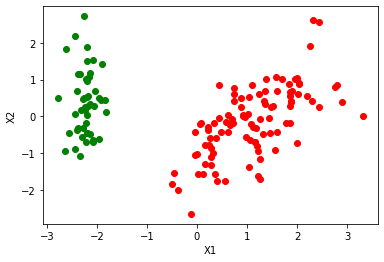

In [34]:
red_df['cluster'] = DBSCAN_predictions

newdf1 = red_df[red_df['cluster']==0]
newdf2 = red_df[red_df['cluster']==1]
plt.scatter(newdf1.X1,newdf1['X2'],color='green')
plt.scatter(newdf2.X1,newdf2['X2'],color='red')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()